---

<h1 align="center">Handwritten digits 
    <h2 align="center">~ Images recognized by an ANN trained with Keras ~
</h2>

---
__1) The Goal:__ Build an Artificial Neural Network recognizing handwritten digits from the MNIST dataset.  
    
    - build a neural network from scratch

    - create a virtual environment for your project

    - train a neural network with Keras

    - choose hyperparameters of a neural network

    - plot a learning curve

    - train a Convolutional Neural Network

    - use a pretrained network on photographs

__2) Get the Data:__ Download the MNIST dataset with Keras. (["Original source"](http://yann.lecun.com/exdb/mnist/)).  
    
__3) Train a Model__     
    
__4) Evaluate the Model__    

__5) Test the Model__    
    
---

<h2 align="center", style="color:green"><strong>Get the Data</strong></h2>

---

In [1]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


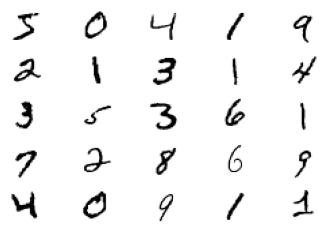

In [2]:
# See the shape of the train and test

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Plot some digits

from matplotlib import pyplot as plt

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [6]:
X_train = X_train.reshape(60000, 28, 28, 1)/255
X_test = X_test.reshape(10000, 28, 28, 1)/255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

---

<h2 align="center", style="color:green"><strong>Train a Model</strong></h2>

---

### Baseline Model

- extract a subset of 1000 training/test data points from the MNIST dataset

- train a conventional supervised learning model (not a ANN)

- calculate the training and test score as a baseline.  

There will be two intricacies you have to take care of.

1. Defining the right input shape.
2. Dealing with the shape of y. 

### Build a Neural Network

Building and training a neural network in Keras consists of three steps:

- First, build a sequential Keras model by stacking layers on each other.

- Then compile the model to create a TensorFlow computation graph.

- Finally, fit the model with your training data.

The Keras documentation contains a list of all available layers, activation functions etc. For your first steps, experiment with the Dense layer.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras import backend as K
import numpy as np

K.clear_session()

m_batch_norm = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), input_shape=(28, 28, 1), activation='relu'),  
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(50, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# build the computation graph
m_batch_norm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# print all layers
print(m_batch_norm.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

### Train the model

In [39]:
# Train the model
# h_batch_norm = m_batch_norm.fit(X_train, y_train, epochs=15, batch_size=200, validation_split=0.2)

# Save the model:
# m_batch_norm.save('m_batch_norm.h5')

# Load, create and compile the model:
from tensorflow.keras.models import load_model

m = load_model("model.h5")
m.summary()

# m_batch_norm = load_model("m_batch_norm_model.h5")
# m_batch_norm.summary()'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                80050     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

---

<h2 align="center", style="color:green"><strong>Evaluate and Tune the Model</strong></h2>

---

In [40]:
score = m.evaluate(X_train, y_train, batch_size=100)
print(score)

600/600 [==============================] - 10s 17ms/step - loss: 0.0941 - accuracy: 0.9709
[0.09413731098175049, 0.9709333181381226]


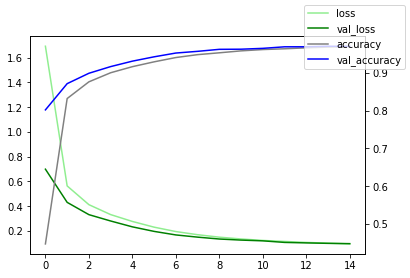

In [41]:
fig, ax1 = plt.subplots()
ax1.plot(h.history['loss'], color="lightgreen", label="loss") 
ax1.plot(h.history['val_loss'], color="green", label="val_loss") 
ax2 = ax1.twinx()
ax2.plot(h.history['accuracy'], color="grey", label='accuracy') 
ax2.plot(h.history['val_accuracy'], color="blue", label='val_accuracy') 
fig.legend();

Hyperparameters: 
- number of layers,
- number of filters, 
- filter-size, 
- max/mean pooling, 
- stride (filter and pooling),
- regularization,
- epochs,
- ...

---

<h2 align="center", style="color:green"><strong>Test the Model</strong></h2>

---

In [42]:
# prediction on new data points
print(m.predict(X_test[:10]))

[[1.18600660e-07 7.38473034e-08 3.48934002e-04 1.22026984e-04
  4.20045353e-11 9.44075225e-07 4.37541388e-13 9.99525428e-01
  1.66342352e-06 8.27626991e-07]
 [1.92367297e-05 4.04098630e-03 9.95920181e-01 1.67905473e-05
  1.73663320e-14 9.85793336e-10 1.23006387e-07 2.27217013e-11
  2.61417108e-06 4.48524963e-16]
 [4.62434000e-05 9.97421145e-01 1.09910376e-04 2.55733939e-05
  1.57540804e-03 1.00650768e-05 1.97487112e-04 5.13502571e-04
  9.42536208e-05 6.34009939e-06]
 [9.99901414e-01 9.13235598e-10 5.22011123e-06 1.12786172e-08
  9.92911637e-08 9.28509235e-06 4.07684311e-05 4.53016014e-07
  1.27791708e-07 4.24975442e-05]
 [2.40219322e-07 2.73061119e-07 1.37858569e-06 7.47208446e-08
  9.96252477e-01 2.07409607e-06 5.15436932e-06 2.48143424e-05
  3.27490937e-07 3.71326855e-03]
 [2.89219361e-06 9.96956587e-01 5.75643980e-06 3.41461009e-06
  1.33499538e-03 6.77536676e-08 1.24787118e-06 1.67248107e-03
  2.06037148e-05 1.97444069e-06]
 [1.31013977e-10 1.10223584e-04 2.34823805e-08 2.41518137e

In [43]:
m.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 14ms/step - loss: 0.0859 - accuracy: 0.9722


[0.08586088567972183, 0.9721999764442444]

In [44]:
m.predict_classes(X_test, batch_size=100)

array([7, 2, 1, ..., 4, 5, 6])

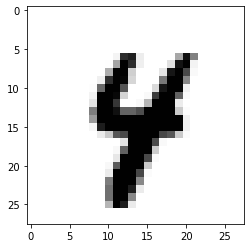

In [45]:
plt.imshow(X_test[-3], cmap=plt.cm.Greys);

### Debugging Checklist

- plot the model summary

- add accuracy to the metrics

- set a validation dataset

- draw learning curve

- vary the number of layers/neurons

- try a few learning strategies

- save checkpoints during training

- plot a histogram of model weights before/after training